In [1]:
#Process Image using OpenCV form Object Detection using YOLOv2

In [1]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='svg'

In [2]:
options={
    'model': 'cfg/yolo.cfg',
    'load': 'bin/yolov2.weights',
    'threshold': 0.3,
    #'gpu': 1.0
}

In [3]:
tfnet = TFNet(options)

C:\Users\soumyama\Documents\Python Scripts\YOLO\darkflow\darkflow\dark\darknet.py:54: UserWarning: ./cfg/yolov2.cfg not found, use cfg/yolo.cfg instead
  cfg_path, FLAGS.model))


Parsing cfg/yolo.cfg
Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.025074005126953125s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +b

In [20]:
img= cv2.imread("C:\\Users\\soumyama\\Pictures\\dog.jpg", cv2.IMREAD_COLOR)
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

result = tfnet.return_predict(img)
#cv2.imshow(img)
print(result)

[{'label': 'dog', 'confidence': 0.6115596, 'topleft': {'x': 90, 'y': 9}, 'bottomright': {'x': 268, 'y': 182}}, {'label': 'bear', 'confidence': 0.36652014, 'topleft': {'x': 83, 'y': 11}, 'bottomright': {'x': 252, 'y': 172}}]


In [21]:
tl= (result[0]['topleft']['x'], result[0]['topleft']['y'])
br= (result[0]['bottomright']['x'], result[0]['bottomright']['y'])
label= result[0]['label']

In [22]:
print("tl ",tl,"\nbr ",br, "\nlabel ", label)

tl  (90, 9) 
br  (268, 182) 
label  dog


<function matplotlib.pyplot.show(*args, **kw)>

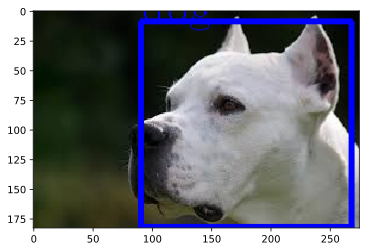

In [24]:
#Draw bounding box

img_box= cv2.rectangle(img, tl,br, (0,0,255), 4)
img_box= cv2.putText(img, label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 1)
plt.imshow(img_box)
plt.show